    # Cars selling

##### Made by: Pavlo Kukurik, Sviatoslav Sharak

## **DATA DESCRIPTION**
#### Description of the dataset columns

1. **`Year`:** The manufacturing year of the vehicle (e.g., 2015) <br>
2. **`Make`:** The brand or manufacturer of the vehicle (e.g., Kia, BMW, Volvo) <br>
3. **`Model`:** The specific model of the vehicle (e.g., Sorento, 3 Series, S60, 6 Series Gran Coupe) <br>
4. **`Trim`:** Additional designation for a particular version or option package of the model (e.g., LX, 328i SULEV, T5, 650i) <br>
5. **`Body`:** The type of vehicle body (e.g., SUV, Sedan) <br>
6. **`Transmission`:** The type of transmission in the vehicle (e.g., automatic) <br>
7. **`VIN:`** The Vehicle Identification Number, a unique code used to identify individual motor vehicles <br>
8. **`State`:** The state in which the vehicle is located or registered (e.g., CA for California) <br>
9. **`Condition`:** A numerical representation of the condition of the vehicle (e.g., 5.0) <br>
10. **`Odometer`:** The mileage or distance traveled by the vehicle <br>
11. **`Color`:** The exterior color of the vehicle <br>
12. **`Interior`:** The interior color of the vehicle <br>
13. **`Seller`:** The entity or company selling the vehicle (e.g., Kia Motors America Inc, Financial Services Remarketing) <br>
14. **`MMR`:** Mannheim Market Report, a pricing tool used in the automotive industry <br>
15. **`Selling Price:`** The price at which the vehicle was sold <br>
16. **`Sale Date:`** The date and time when the vehicle was sold <br>

In [1]:
from typing import Tuple

# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head(1000)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0e7xckc08558,ca,47.0,30843.0,white,beige,ford motor credit company llc pd,15750.0,16000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
996,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbgxcr138394,ca,44.0,97805.0,silver,black,wheels exchange llc,7975.0,8900.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
997,2012,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pf5sc5c7318718,ca,42.0,26691.0,white,gray,ge fleet services for itself/servicer,10450.0,11500.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
998,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg2cr308102,ca,29.0,54064.0,black,beige,tdaf remarketing,10650.0,11750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### **Firstly Let`s clean our dataset**

In [4]:
# First let`s drop useless columns (vin, seller).
if 'vin' in df.columns:
    df = df.drop(columns='vin')
    
if 'seller' in df.columns:
    df = df.drop(columns='seller')
    
df = df.dropna()

In [5]:
# Let`s check how many values in each column are NaM
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# # Delete all NaN rows from dataset
# df = df.dropna()
# # Here we can see how df has changed 
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


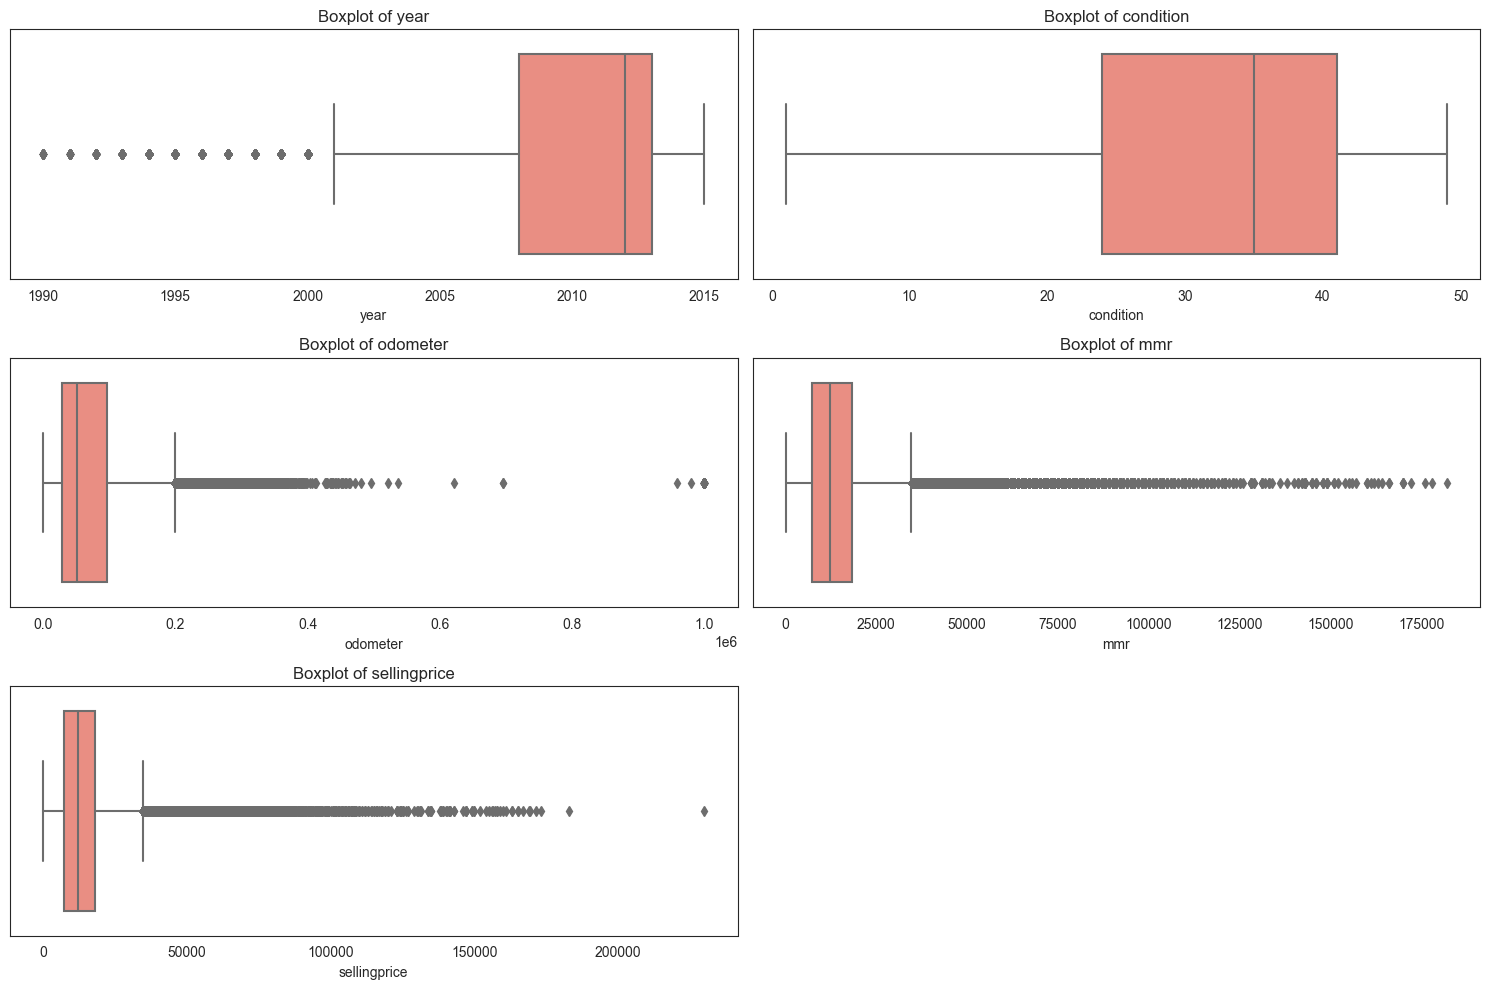

In [36]:
# Let visualise boxplot to see outliers for each numeric columns
def box_plot(data: pd.DataFrame) -> plt:
    """
    The func visualise the boxplot
    :param data: name of dataframe
    :return: plot
    """
    sns.set_style("white")
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols)//2 + 1, 2, i+1)
        sns.boxplot(x=data[col], color='salmon')
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()
    
box_plot(df)

In [38]:
def bound_counter(data: pd.DataFrame) -> tuple[pd, pd]:
    """
    The func calculate upper and lower bounds
    :param data: name of dataset
    :return: values of bounds
    """
    Q1 = data.quantile(0.25, numeric_only=True)
    Q3 = data.quantile(0.75, numeric_only=True)
    
    IQR = Q3 - Q1
    
    threshold = 1.5
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    return lower_bound, upper_bound
    
    
def outliers_counter(data: pd.DataFrame) -> str:
    """
    The func calculate number of outliers for each column in the dataset 
    :param data: name of dataset
    :return: number of outliers for each column
    """
    # df_clipped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

    outliers_count = ((data.select_dtypes(include=['float64', 'int64']) < bound_counter(data)[0]) |
                      (data.select_dtypes(include=['float64', 'int64']) > bound_counter(data)[1])).sum()

    return f"Number of outliers for each numerical column:\n{outliers_count}"

print(outliers_counter(df))

Number of outliers for each numerical column:
year             9799
condition           0
odometer         9029
mmr             14038
sellingprice    14118
dtype: int64


Number of outliers for each numerical column:
year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64


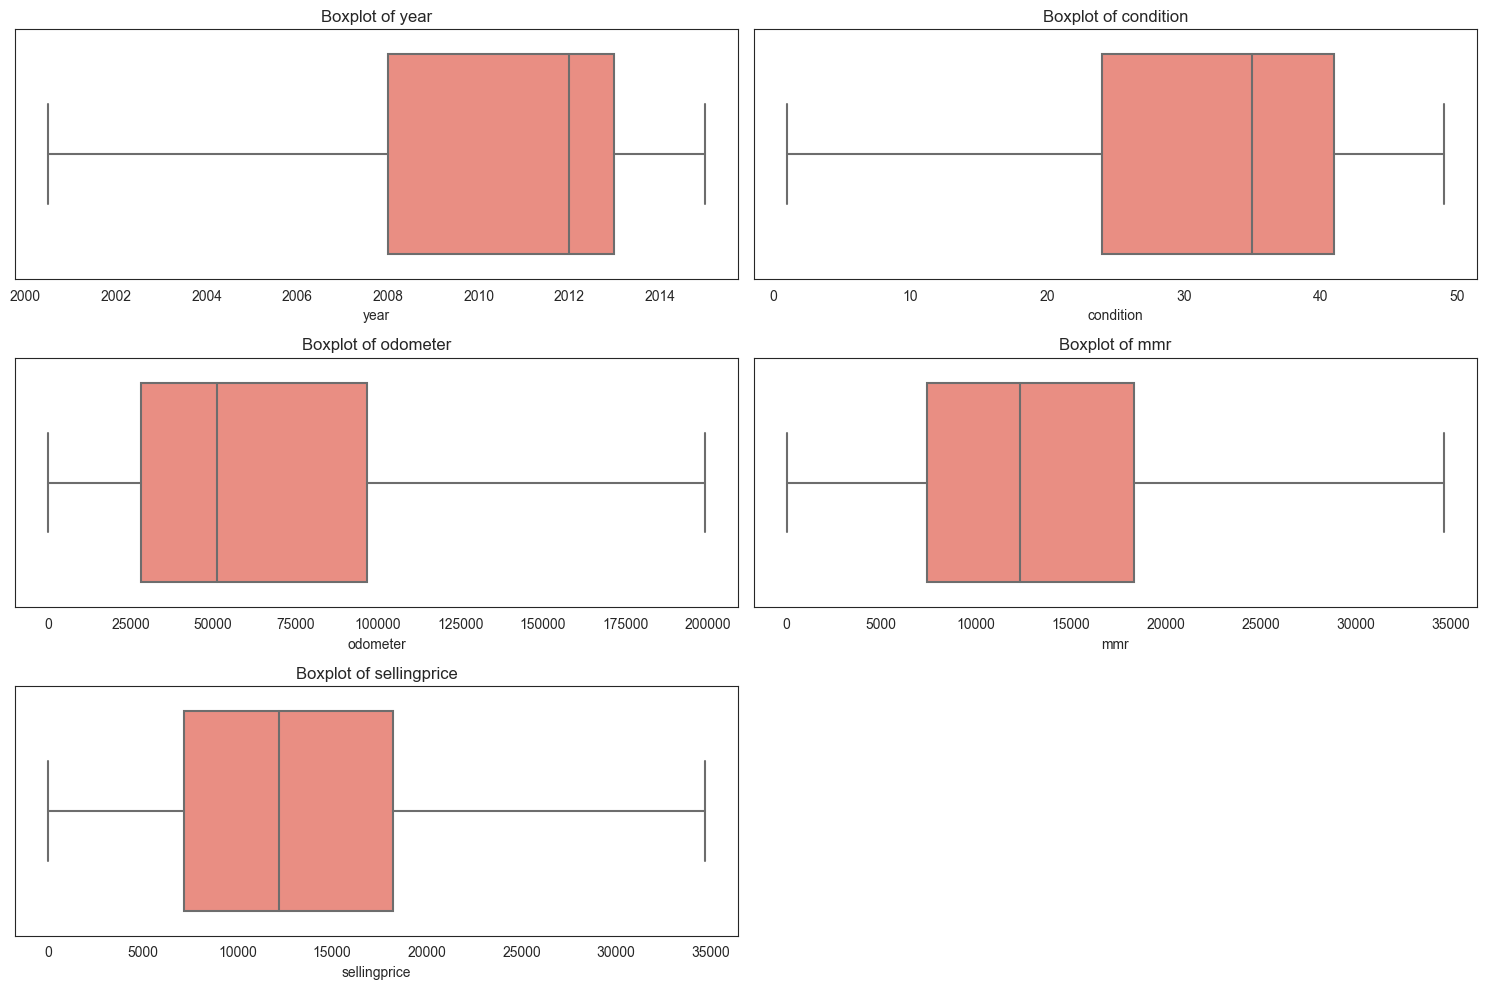

In [90]:
lower_bound, upper_bound = bound_counter(df)[0], bound_counter(df)[1]
cleaned_df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

print(outliers_counter(cleaned_df))
box_plot(cleaned_df)

### **Now when we clear our dataset from Nan values and useless columns let`s see some interesting information that consider this dataset**

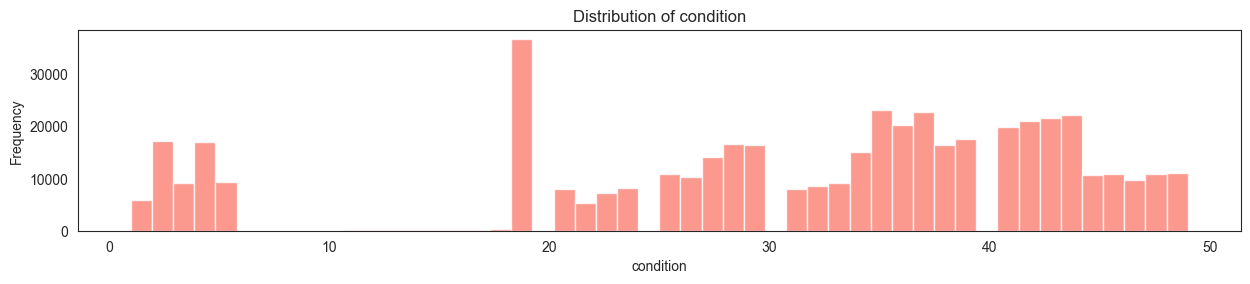

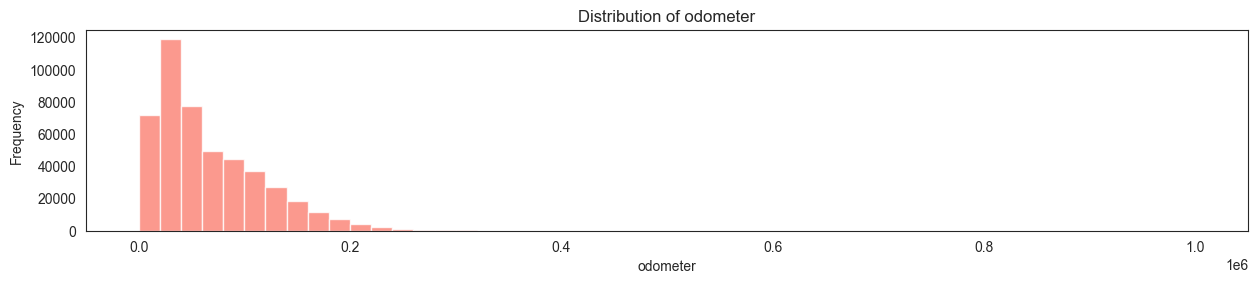

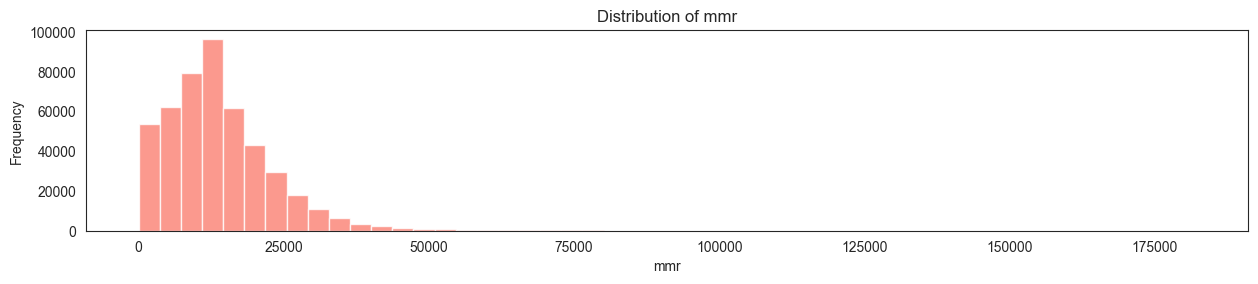

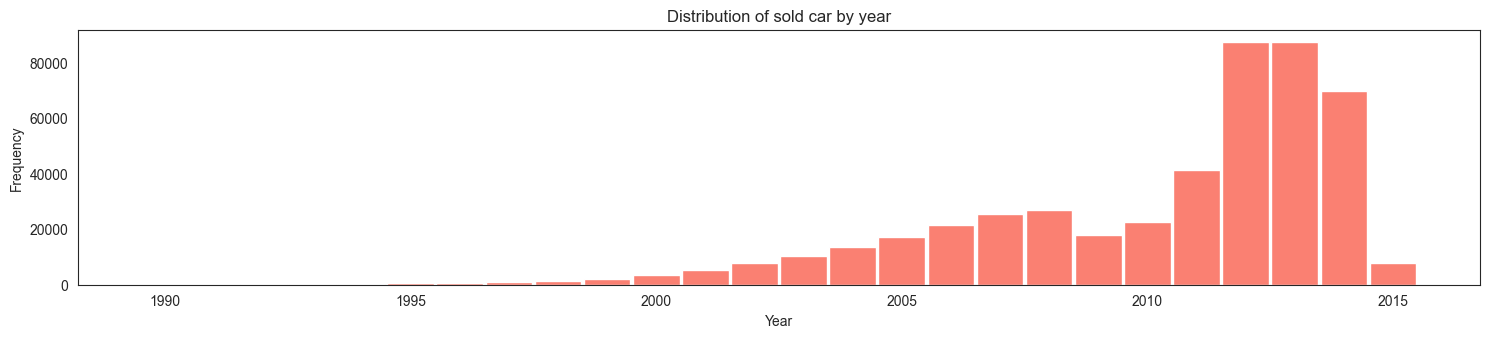

In [43]:
# plt.style.use('seaborn-white')

def plot_distribution(column_name: list[str]) -> plt:
    """
    The func plot distribution for columns in the dataframe
    :param column_name: name of column to plot
    :return: Graphic of distribution
    """
    for num, name in enumerate(column_name):
        plt.figure(figsize=(15, 12))
        plt.subplot(4, 1, num + 1)
        plt.hist(df[name], bins=50, color='salmon', alpha=0.8)
        plt.title(f'Distribution of {name}')
        plt.xlabel(f'{name}')
        plt.ylabel('Frequency')
        plt.show()
    
plot_distribution(['condition', 'odometer', 'mmr'])


cars_sold_by_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(15, 12))
plt.subplot(4, 1, 4)
plt.bar(cars_sold_by_year.index, cars_sold_by_year.values, color='salmon', width=0.95)
plt.title('Distribution of sold car by year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

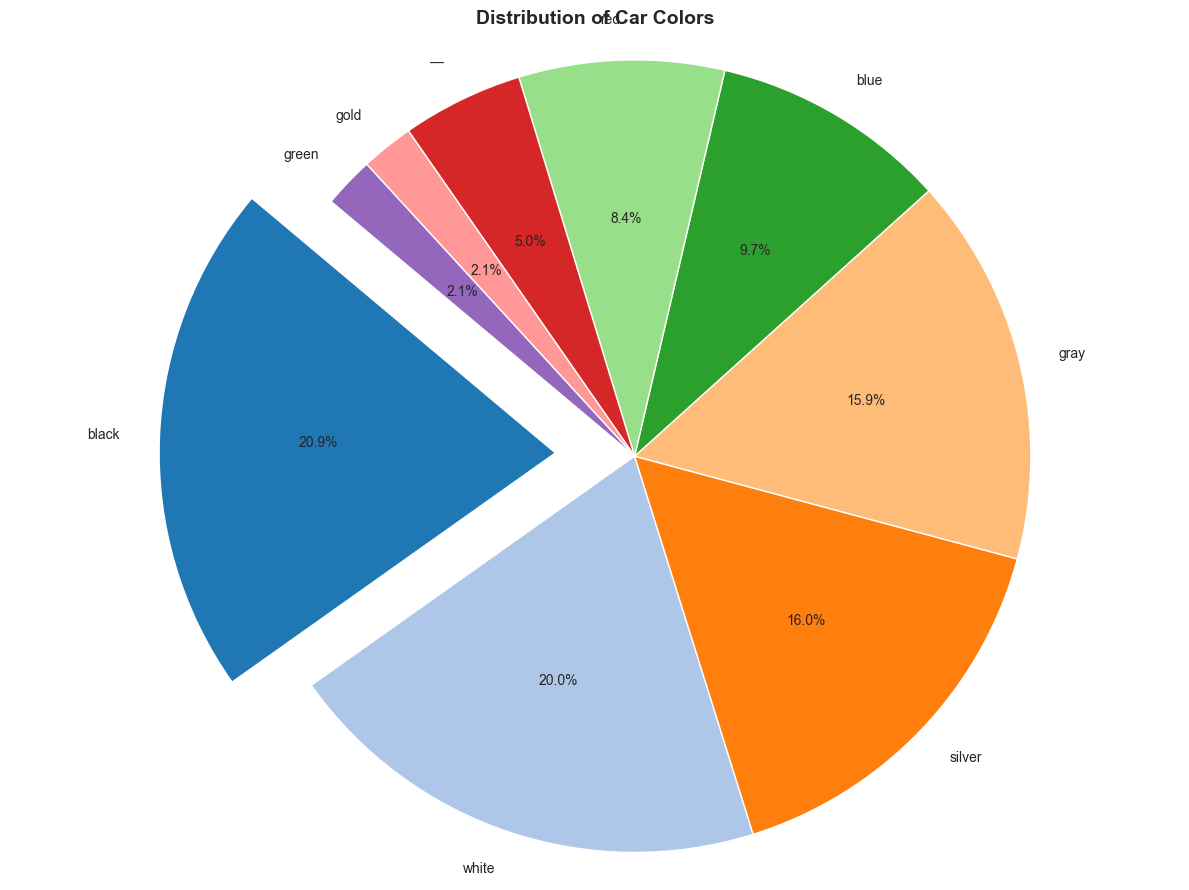

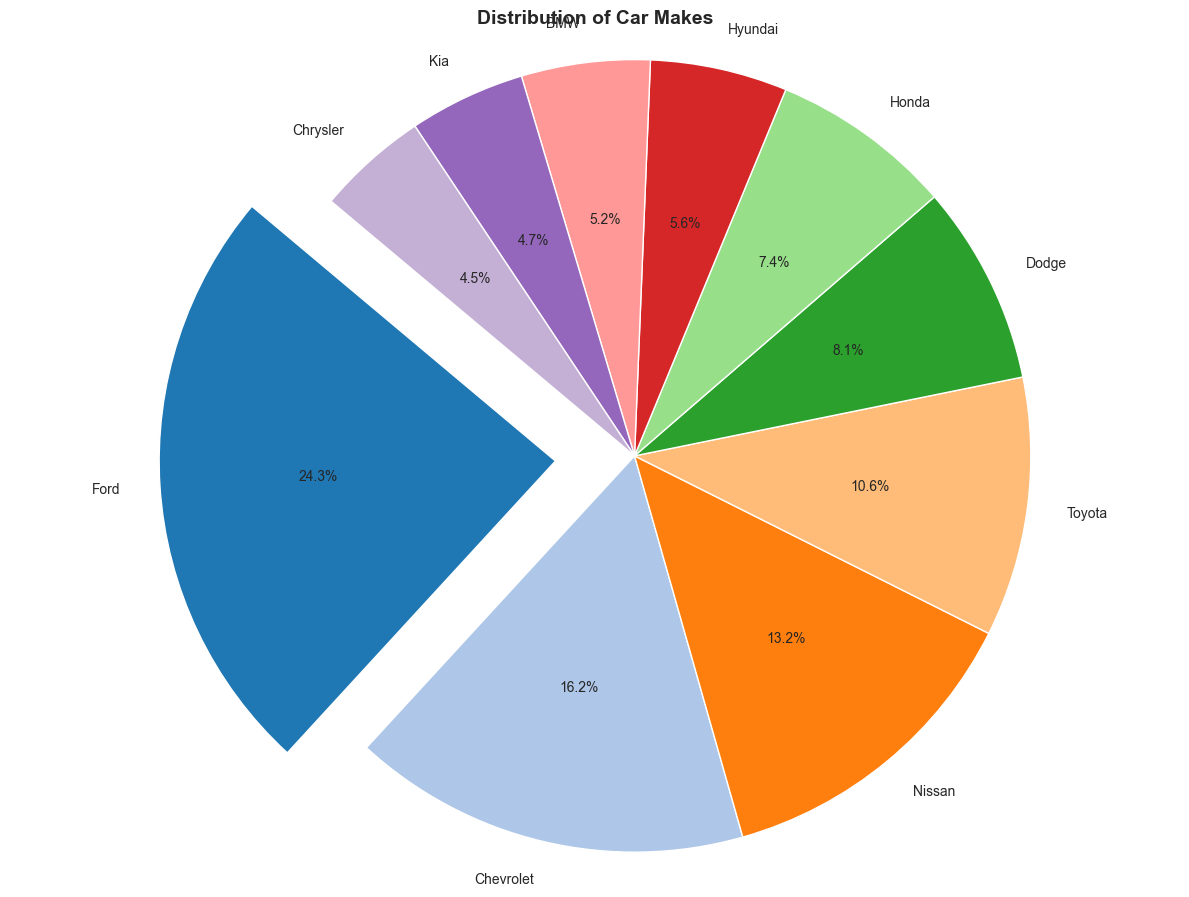

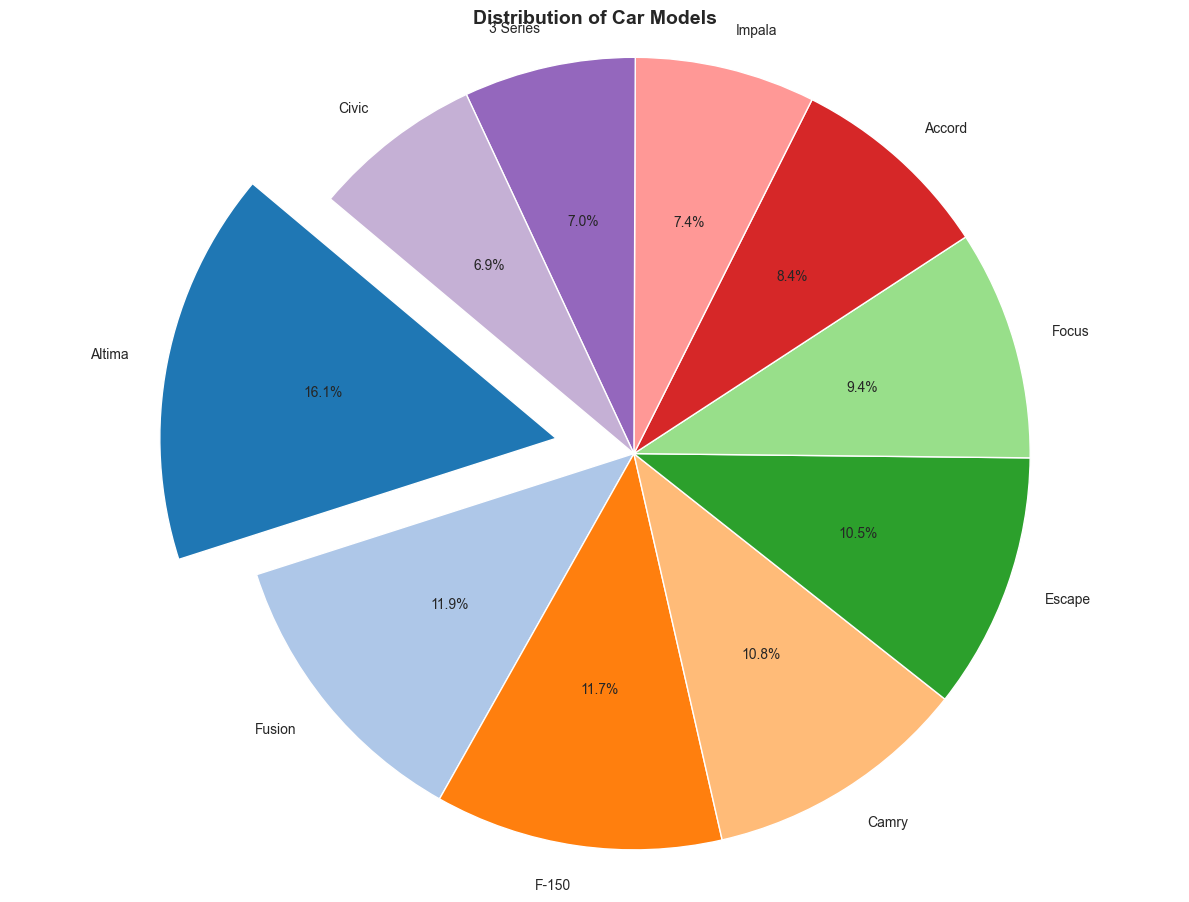

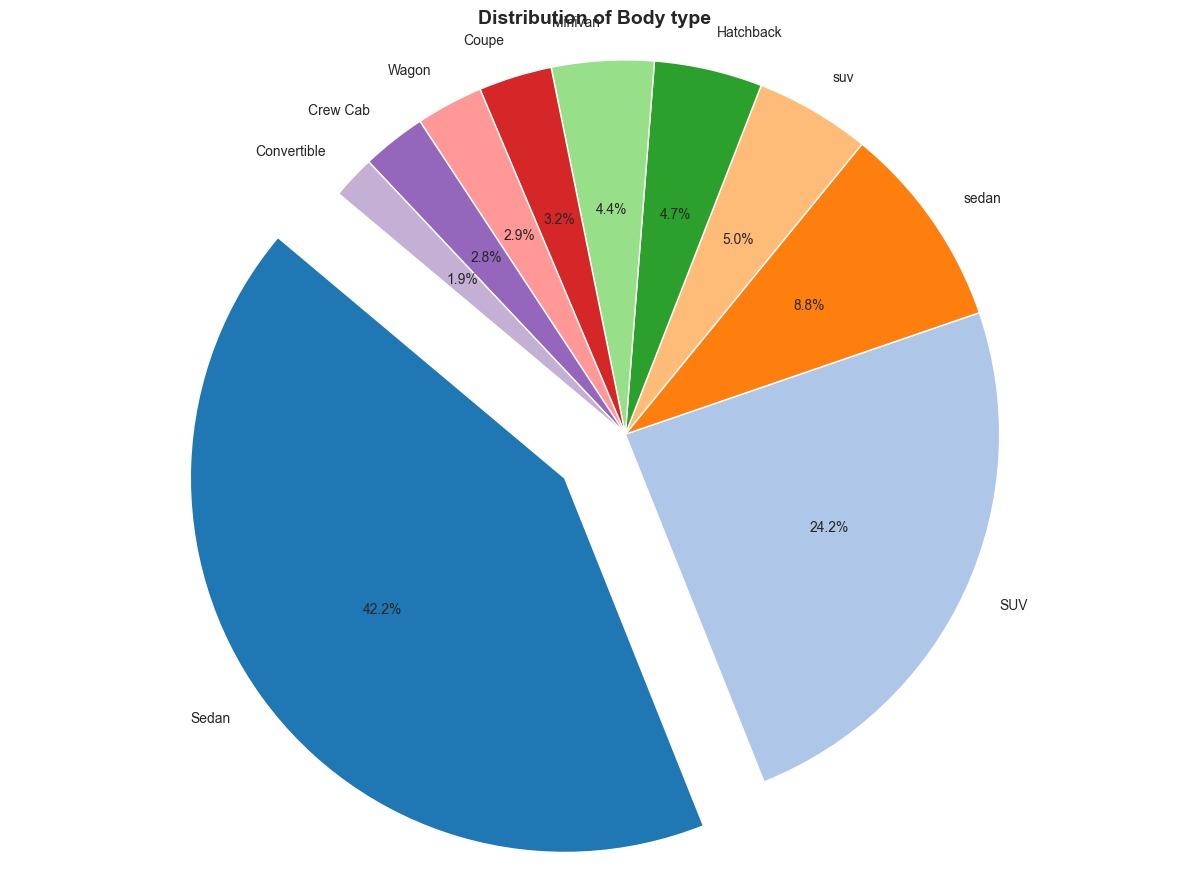

In [83]:
# Let`s see the moat popular color, model and brand
import matplotlib.pyplot as plt

def plot_pie_chart(column, title, limit=10):
    """
    The func plot pie chart diagram
    :param column: name of column in dataset to plot
    :param title: title of plot
    :param limit: limit of chart
    :return: plot
    """
    counts = df[column].value_counts().head(limit)
    colors = plt.cm.tab20.colors[:len(counts)]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)[:limit]
    
    plt.figure(figsize=(12, 9))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops=dict(width=1))
    plt.title(title, fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plot_pie_chart('color', 'Distribution of Car Colors', limit=9)
plot_pie_chart('make', 'Distribution of Car Makes')
plot_pie_chart('model', 'Distribution of Car Models')
plot_pie_chart('body', 'Distribution of Body type')

### Build an OLS model

In [91]:
y = cleaned_df['sellingprice']

X = cleaned_df[['year', 'condition', 'odometer', 'mmr']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.474e+06
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:53:39   Log-Likelihood:            -4.1314e+06
No. Observations:              472325   AIC:                         8.263e+06
Df Residuals:                  472320   BIC:                         8.263e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.428e+04   2144.579     43.962      0.000    9.01e+04    9.85e+04
year         -47.3798      1.066    -44.446      0.000     -49.469     -45.290
condition     36.6040      0.178    205.402      0.000      36.255      36.953
odometer      -0.0014   8.07e-05    -17.603      0.000      -0.002      -0.001
mmr            0.9844      0.000   2655.772      0.000       0.984       0.985
==============================================================================
Omnibus:                   176125.670   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9406679.251
Skew:                          -1.020   Prob(JB):                         0.00
Kurtosis:                      24.767   Cond. No.                     7.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_cols = cleaned_df[: -2]


def select_model_aic(data, initial_columns, dependent_var_name):
    """
    Select variables by AIC
    :param data: DataFrame
    :param initial_columns: List of initial columns
    :param dependent_var_name: Name of the dependent variable
    :return: AIC DataFrame, best model
    """
    best_model = None
    best_aic = float('inf')
    columns = initial_columns[:]
    aic_history = []

    while True:
        improvement = False
        models_with_aic = []

        for col in columns:
            temp_columns = [c for c in columns if c != col]
            temp_x = data[temp_columns]
            temp_model = sm.OLS(endog=data[dependent_var_name], exog=sm.add_constant(temp_x)).fit()
            models_with_aic.append((temp_model.aic, col, temp_model))

        models_with_aic.sort()

        if models_with_aic and models_with_aic[0][0] < best_aic:
            best_aic = models_with_aic[0][0]
            best_model = models_with_aic[0][2]
            dropped_col = models_with_aic[0][1]
            aic_history.append({'dropped': dropped_col, 'model_AIC': best_aic})
            columns = [c for c in columns if c != dropped_col]
            improvement = True

        if not improvement:
            break
            
    aic_df = pd.DataFrame(aic_history).style.background_gradient(cmap='viridis').highlight_min(color="red", subset=["model_AIC"])
    return aic_df, best_model

dropped_cols, best_model = select_model_aic(df, x_cols.columns, 'sellingprice')

dropped_cols
